<a href="https://colab.research.google.com/github/elliotgunn/DS-Unit-2-Applied-Modeling/blob/master/assignment_applied_modeling_1_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# pip install category_encoders eli5 scipy pdpbox
# ! pip install plotly==4.1.0
! pip install shap

     |████████████████████████████████| 266kB 2.4MB/s eta 0:00:01


In [0]:
# see installed packages
import sys
sys.path

['/Users/elliotgunn/Google Drive/Predictive Project',
 '//anaconda3/lib/python37.zip',
 '//anaconda3/lib/python3.7',
 '//anaconda3/lib/python3.7/lib-dynload',
 '',
 '//anaconda3/lib/python3.7/site-packages',
 '//anaconda3/lib/python3.7/site-packages/aeosa',
 '//anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/elliotgunn/.ipython']

In [0]:
# the python path and the executable used by the notebook must match for package installation
!type python


python is //anaconda3/bin/python


In [0]:
sys.executable

'//anaconda3/bin/python'

In [0]:
# update all packages
# conda update --all

## Research

https://www.sciencedirect.com/science/article/pii/S0968090X18311021

https://academic.oup.com/tse/advance-article/doi/10.1093/tse/tdy001/5306170

## Import multiple files from directory and `concat` into single df

Example: 

https://stackoverflow.com/questions/20908018/import-multiple-excel-files-into-python-pandas-and-concatenate-them-into-one-dat
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe


In [0]:
import os
import pandas as pd

# list files
path = os.getcwd()
files = os.listdir(path)
files

['Subway_&_SRT_Logs_December_2018.xlsx',
 'assignment_applied_modeling_1_classification.ipynb',
 'Subway_&_SRT_Logs_May2019.xlsx',
 'Subway_&_SRT_Logs_(August_2018).xlsx',
 '.DS_Store',
 'Subway_SRT_Logs(October 2018).xlsx',
 'Subway_&_SRT_Logs_(September_2018).xlsx',
 'Untitled.ipynb',
 'Subway_&_SRT_Logs_(December_2017).xlsx',
 'Subway_&_SRT_Logs_February2019.xlsx',
 'SubwaySRTLogs201710.xlsx',
 'Subway&SRT_Logs_April_2018.xlsx',
 'SubwaySRTLogs201707.xlsx',
 'Subway & SRT Logs (May 2017).xlsx',
 'Subway_SRT_Logs(January 2018).xlsx',
 'Subway&SRT_Logs_May_2018.xlsx',
 'Subway_&_SRT_Logs_November_2018.xlsx',
 'Subway&SRT_Logs_February_2018.xlsx',
 'SubwaySRTLogs201708.xlsx',
 'Subway_&_SRT_Logs_(November_2017).xlsx',
 'Subway&SRT_Logs_March_2018.xlsx',
 'Subway_SRT_Logs(June2018).xlsx',
 'SubwaySRTLogs201709.xlsx',
 '.ipynb_checkpoints',
 'Subway_&_SRT_Logs_April2019.xlsx',
 'Subway_&_SRT_Logs_January_2019.xlsx',
 'Subway & SRT Logs (Jan01_14 to April30_17).xlsx',
 'Subway_&_SRT_Logs_

In [0]:
# Pick out 'xls' files
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
files_xlsx

['Subway_&_SRT_Logs_December_2018.xlsx',
 'Subway_&_SRT_Logs_May2019.xlsx',
 'Subway_&_SRT_Logs_(August_2018).xlsx',
 'Subway_SRT_Logs(October 2018).xlsx',
 'Subway_&_SRT_Logs_(September_2018).xlsx',
 'Subway_&_SRT_Logs_(December_2017).xlsx',
 'Subway_&_SRT_Logs_February2019.xlsx',
 'SubwaySRTLogs201710.xlsx',
 'Subway&SRT_Logs_April_2018.xlsx',
 'SubwaySRTLogs201707.xlsx',
 'Subway & SRT Logs (May 2017).xlsx',
 'Subway_SRT_Logs(January 2018).xlsx',
 'Subway&SRT_Logs_May_2018.xlsx',
 'Subway_&_SRT_Logs_November_2018.xlsx',
 'Subway&SRT_Logs_February_2018.xlsx',
 'SubwaySRTLogs201708.xlsx',
 'Subway_&_SRT_Logs_(November_2017).xlsx',
 'Subway&SRT_Logs_March_2018.xlsx',
 'Subway_SRT_Logs(June2018).xlsx',
 'SubwaySRTLogs201709.xlsx',
 'Subway_&_SRT_Logs_April2019.xlsx',
 'Subway_&_SRT_Logs_January_2019.xlsx',
 'Subway & SRT Logs (Jan01_14 to April30_17).xlsx',
 'Subway_&_SRT_Logs_March2019.xlsx',
 'SubwayDelay201706.xlsx',
 'Subway_SRT_Logs(July_2018).xlsx']

In [0]:
# initialize empty dataframe
df = pd.DataFrame()

# loop over list of files to append to empty dataframe

for f in files_xlsx:
    data = pd.read_excel(f)
    df = df.append(data)

df.shape

(110909, 10)

In [0]:
df.head()

Date   Time       Day              Station  Code  Min Delay  Min Gap  \
0 2018-12-01  00:11  Saturday     YONGE BD STATION  SUDP          0        0   
1 2018-12-01  01:13  Saturday  DUNDAS WEST STATION  SUAP          0        0   
2 2018-12-01  01:35  Saturday     SHEPPARD STATION  EUSC          0        0   
3 2018-12-01  01:46  Saturday  DUNDAS WEST STATION   SUO          4        8   
4 2018-12-01  01:51  Saturday     WOODBINE STATION  SUDP          0        0   

  Bound Line  Vehicle  
0   NaN   BD        0  
1     W   BD     5339  
2     N   YU     5651  
3     W   BD     5339  
4   NaN   BD        0

## wrangle + train/val/test

**Feature engineering approaches:**

> But Stockholmståg has found a way to use that data to also predict the ripple effect a single delay has on its entire system. An accident somewhere along its route means a train will be delayed before it rolls into the next station. But that also affects the train behind it, and the train behind it, and so forth. Eventually a single incident can throw off the scheduling of an entire commuter system, even if the original source of the disruption has already been resolved. [link](https://gizmodo.com/a-new-algorithm-can-predict-subway-delays-two-hours-bef-1729539784)

Leakage: 
Possibly with `Min Gap`: Time length (in minutes) between trains


In [0]:
def wrangle(X):
  
  X = X.copy()
  
  # unique id
  X['index_col'] = X.index

  # Convert 'Date' to datetime
  X['Date'] = pd.to_datetime(X['Date'], infer_datetime_format=True)
  
  # Extract components from 'Date', then drop original column
  X['year'] = X['Date'].dt.year
  X['month'] = X['Date'].dt.month
  X['day'] = X['Date'].dt.day
  X = X.drop(columns='Date')
  
  # 'Time' is a timestamp: we have hour and minute information
  # Extract components from 'Time', then drop original column
  X['Time'] = pd.to_datetime(X['Time'], infer_datetime_format=True)
  X['hour'] = X['Time'].dt.hour
  X['minute'] = X['Time'].dt.minute
  X = X.drop(columns='Time')
    
  # more features
    # daily weather conditions
    # was there a delay at the station previously on that day
 
  # Return wrangled dataframe
  return X

df = wrangle(df)

In [0]:
df.head()
df['year'].value_counts()

2015    21474
2016    21162
2018    20737
2014    20424
2017    18885
2019     8227
Name: year, dtype: int64

In [0]:
train = df[df['year'] < 2018]
val = df[df['year'] == 2018]
test = df[df['year'] == 2019]

train.shape, val.shape, test.shape

((81945, 14), (20737, 14), (8227, 14))

In [0]:
# arrange data into X features matrix and y target vector
target = 'Min Delay'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test
y_test = test[target]

## Exploratory Visualizations

In [0]:
# recombine features and labels for exploratory data analysis

y = train[target]
train_copy = train.copy()
train_copy['Min Delay'] = y

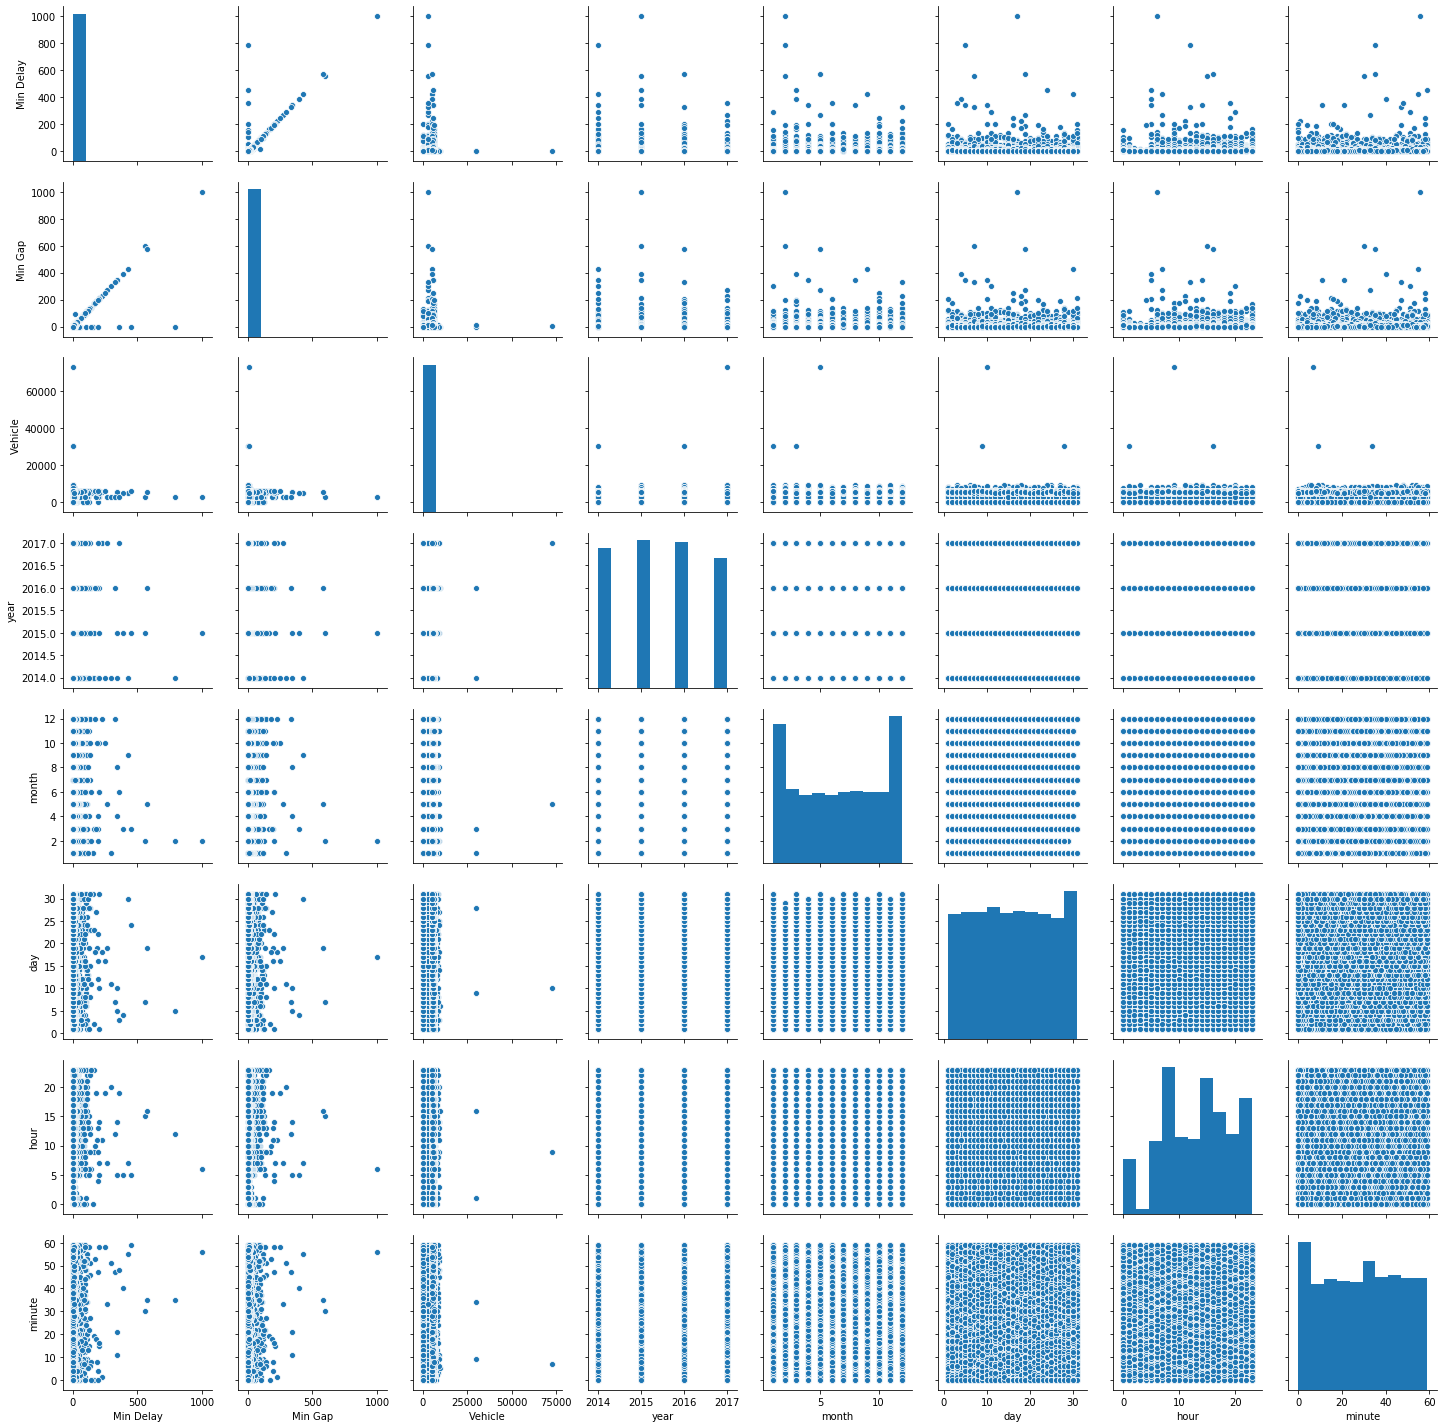

In [0]:
# pairplot 

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_copy)
plt.show()

In [0]:
# get cardinality
for col in sorted(train_copy.columns):
    print(col, train_copy[col].nunique())

Bound 7
Code 201
Day 7
Line 45
Min Delay 146
Min Gap 136
Station 333
Vehicle 974
day 31
hour 24
minute 60
month 12
year 4


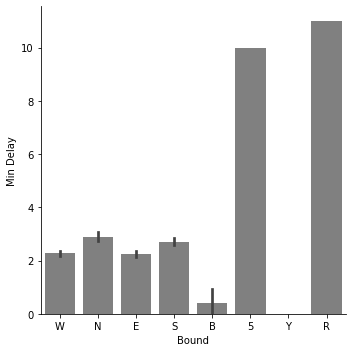

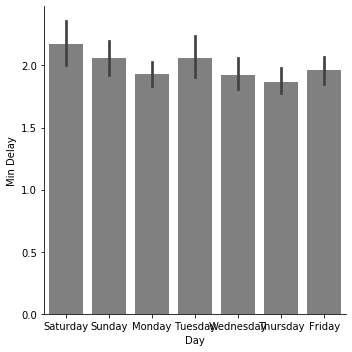

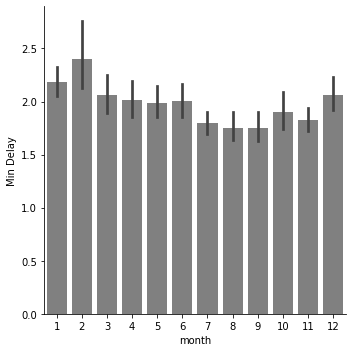

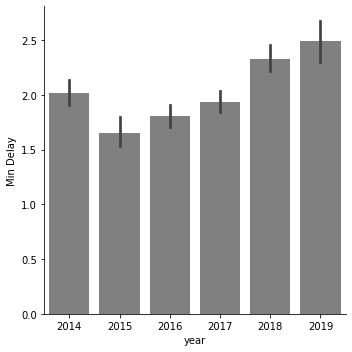

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in sorted(train_copy.columns):
  if train_copy[col].nunique() < 15:
    sns.catplot(x=col, y='Min Delay', data=train_copy, kind='bar', color='grey')
    plt.show()

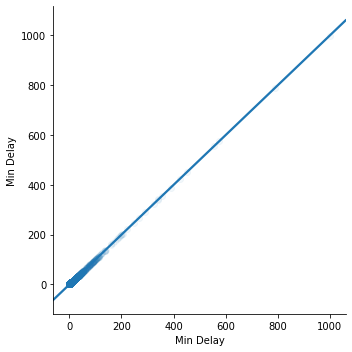

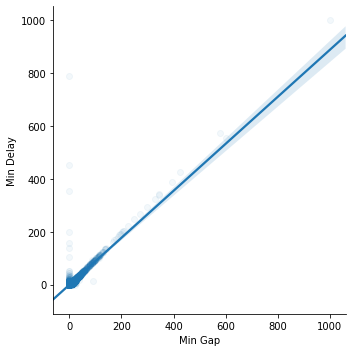

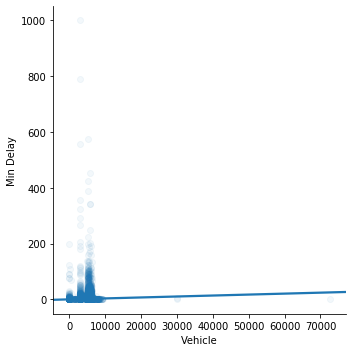

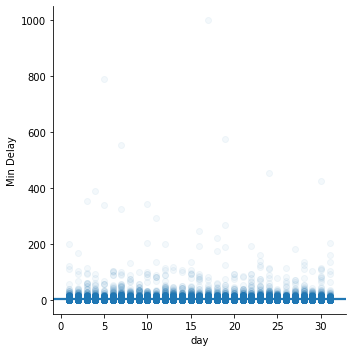

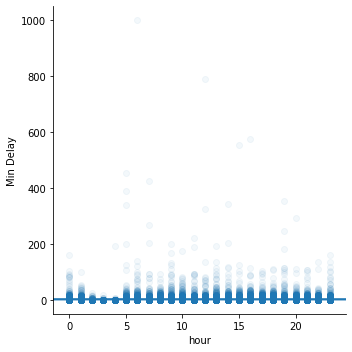

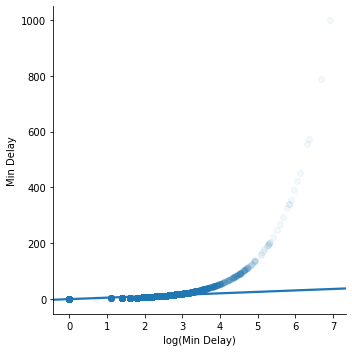

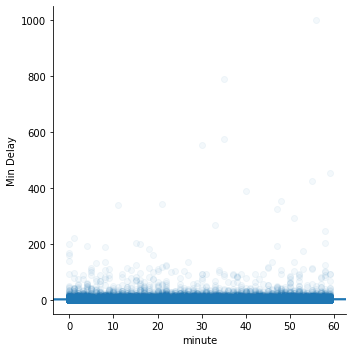

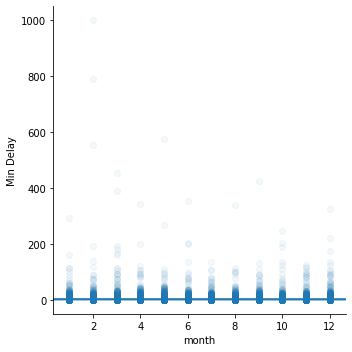

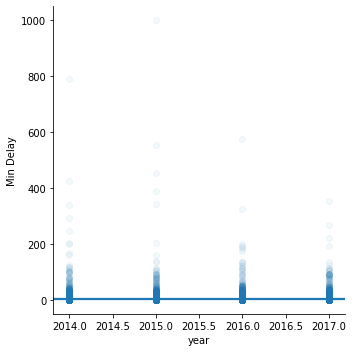

In [0]:
numeric = train_copy.select_dtypes('number')
for col in sorted(numeric.columns):
  sns.lmplot(x=col, y='Min Delay', data=train_copy, scatter_kws=dict(alpha=0.05))
  plt.show();

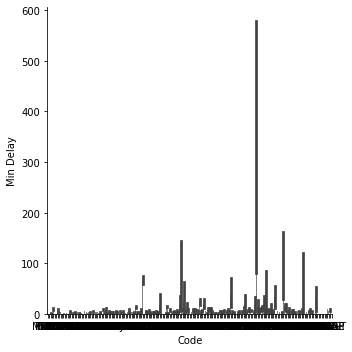

In [0]:
# Code and Min Delay

sns.catplot(x='Code', y='Min Delay', data=train, kind='bar', color='grey')
plt.show()

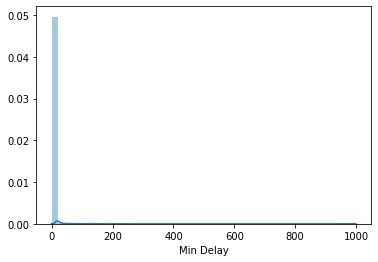

In [0]:
# histogram of Min Delay
# extreme right skew

sns.distplot(train_copy['Min Delay'])
plt.show();

In [0]:
train_copy['Min Delay'].describe()

count   81,945
mean         2
std          9
min          0
25%          0
50%          0
75%          3
max        999
Name: Min Delay, dtype: float64

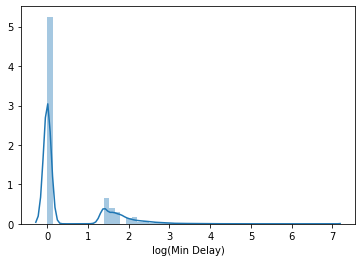

In [0]:
# log transform the target
import numpy as np

y = train_copy['Min Delay']
y_log = np.log1p(y)
train_copy['log(Min Delay)'] = y_log

# plot distribution of log-transformed target
sns.distplot(train_copy['log(Min Delay)']);


In [0]:
y_log.describe()

count   81,945
mean         0
std          1
min          0
25%          0
50%          0
75%          1
max          7
Name: Min Delay, dtype: float64

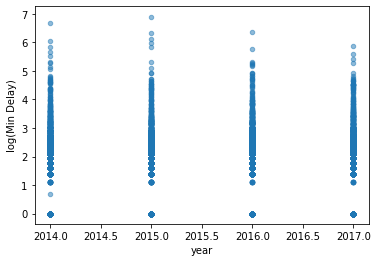

In [0]:
ax = train_copy.plot(x='year', y='log(Min Delay)', kind='scatter', alpha=0.5)


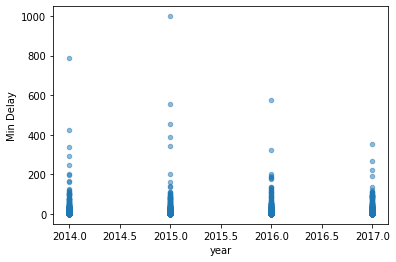

In [0]:
ax = train_copy.plot(x='year', y='Min Delay', kind='scatter', alpha=0.5)


## Baseline

In [0]:
print('Delay, mean:', train_copy['Min Delay'].mean())
print('Delay, mode:', train_copy['Min Delay'].mode())
print('Delay, median:', train_copy['Min Delay'].median())

Delay, mean: 1.849179327597779
Delay, mode: 0    0
dtype: int64
Delay, median: 0.0


In [0]:
# majority class baseline: mode as distribution is extremely skewed

majority_class = train_copy['Min Delay'].mode()
pred = [majority_class] * len(train_copy['Min Delay'])

# use metric: mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(train_copy['Min Delay'], pred)

76.68037098053573

## Pipeline

In [0]:
%%time
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8720232698944502


## Eval metric

In [0]:
# generate predicted
y_pred = pipeline.predict(X_val)

## Feature Importances


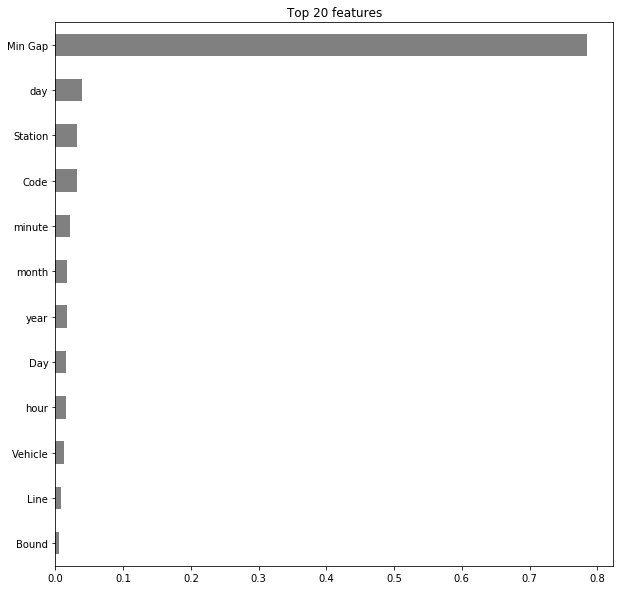

In [0]:
# feature importances

# get feature importances
rf = pipeline.named_steps['randomforestregressor']

importances = pd.Series(rf.feature_importances_, X_train.columns)

# plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# Looking at Min Gap specifically for leakage

column  = 'Min Gap'

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy with Min Gap: 0.8720232698944502
Validation Accuracy without Min Gap: 0.11411268136728125
Drop-Column Importance for Min Gap: 0.757910588527169


In [0]:
# permutation importances

transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

# this runs predict() on each feature

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, n_iter=2, random_state=42
)

permuter.fit(X_val_transformed, y_val)

feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features
    feature_names=feature_names
)

## Partial dependence plot (with two features)

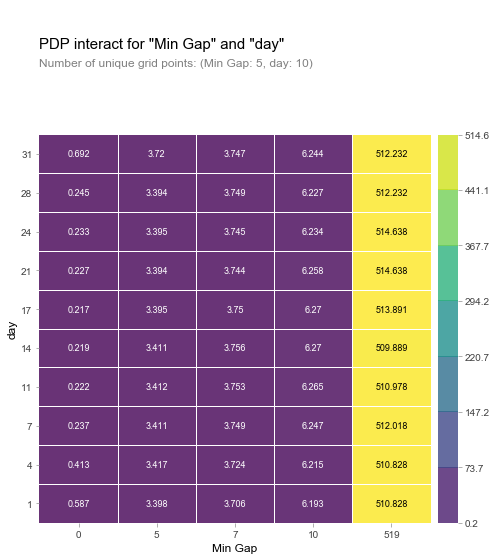

In [0]:
# reduce to two features only
features = ['Min Gap', 'day']

# pdp
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# make pipeline & fit model
rf = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
) 

rf.fit(X_train, y_train)

# pdp
interaction = pdp_interact(
    model=rf, 
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);
# save this as a pic for Plotly, rather than dynamically

## 3D graph

In [0]:
import plotly.graph_objs as go

pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending


surface = go.Surface(x=pdp.columns, 
                     y=pdp.index, 
                     z=pdp.values)

fig = go.Figure(surface)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title=features[0]), 
        yaxis=dict(title=features[1]), 
        zaxis=dict(title=target)
    )
)

fig.show()

## Partial dependence plot (with categorical features)

In [0]:
target = 'Min Delay'
features = train.columns.drop(['Min Delay'])

# Use ordinal
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X_train)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

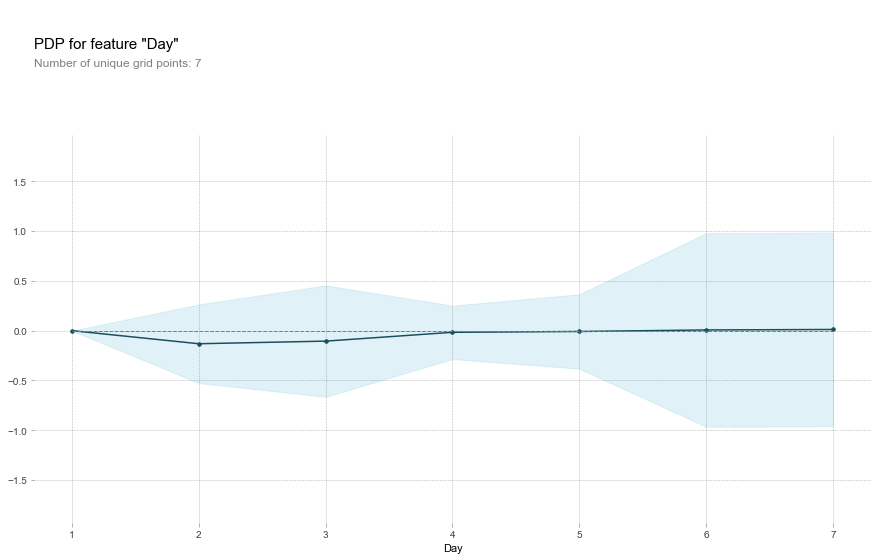

In [0]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'Day'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

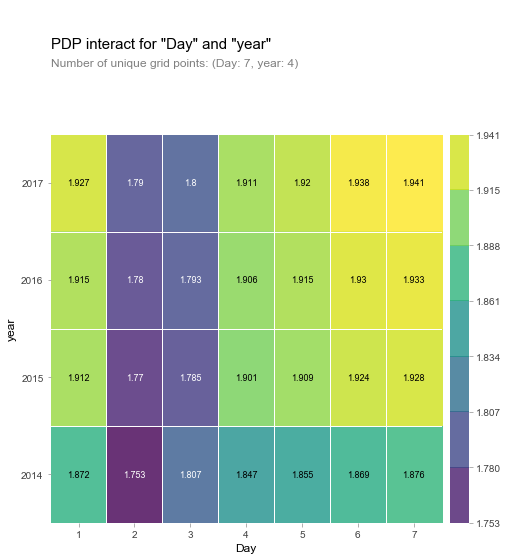

In [0]:
features = ['Day', 'year']

from pdpbox.pdp import pdp_interact, pdp_interact_plot

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

## Shapley force plot to explain one prediction + hyperparameter tuning
If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.

In [0]:
val.columns

Index(['Day', 'Station', 'Code', 'Min Gap', 'Bound', 'Line', 'Vehicle', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [0]:
# Save the ids for later, so we can look up actual results,
# to compare with predicted results
train_id = X_train['index_col']
val_id = X_val['index_col']
test_id = X_test['index_col']

In [0]:
features = ['day', 'year', 'Min Gap']
target = 'Min Delay'
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [0]:
# hyperparameter tuning 

from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   11.4s remaining:   11.4s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   12.5s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.0s finished


In [0]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)
model = search.best_estimator_

Best hyperparameters {'max_depth': 15, 'max_features': 0.7880060113006595, 'n_estimators': 92}
Cross-validation MAE 0.3789694984108445


In [0]:
# define predict function
import shap

def predict(day, year, gap):
    df = pd.DataFrame(
        data=[[day, year, gap]],
        columns=['day', 'year', 'Min Gap']
    )
    pred = model.predict(df)[0]
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(df)
    
    feature_names = df.columns
    feature_values = df.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    
    result = f'Delayed time is estimated at {pred:,.0f} minutes for the Toronto subway. \n\n'
    result += f'Starting from a baseline of {explainer.expected_value:,.0f} minutes. \n'
    result += shaps.to_string()
    print(result)
        
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values,
        features=df
    )

predict(day=1, year=2016, gap=5)

Delayed time is estimated at 3 minutes for the Toronto subway. 

Starting from a baseline of 2 minutes. 
(day, 1)       -0
(year, 2016)   -0
(Min Gap, 5)    1
